In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'
response = requests.get(url)

In [3]:
response #200 means it went through

<Response [200]>

In [4]:
#soup = BeautifulSoup(response.text, 'html.parser')
soup = BeautifulSoup(response.text, 'lxml')

In [5]:
table = soup.findAll('table')[0]
table_rows = table.find_all('tr')
#print(table_rows)

In [6]:
today = time.strftime("%m/%d/%y")
print(today)

02/24/20


In [7]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
print(row)

['02/24/20', '1.60', '1.59', '1.53', '1.49', '1.35', '1.26', '1.21', '1.21', '1.30', '1.38', '1.68', '1.84']


In [8]:
todays_curve = []
for i in row:
    todays_curve.append(i)
todays_curve_no_date = todays_curve
todays_curve_no_date.pop(0)

todays_curve_no_date_float = []
for i in todays_curve_no_date:
    a = float(i)
    todays_curve_no_date_float.append(a)
print(todays_curve_no_date_float)

[1.6, 1.59, 1.53, 1.49, 1.35, 1.26, 1.21, 1.21, 1.3, 1.38, 1.68, 1.84]


In [9]:
labels = ['1 Mo', '2 Mo','3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
mty = [1/12,2/12,3/12,6/12,1,2,3,5,7,10,20,30]

mty_float = []
for i in mty:
    a = float(i)
    mty_float.append(a)
print(mty_float)

[0.08333333333333333, 0.16666666666666666, 0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 30.0]


<function matplotlib.pyplot.show(*args, **kw)>

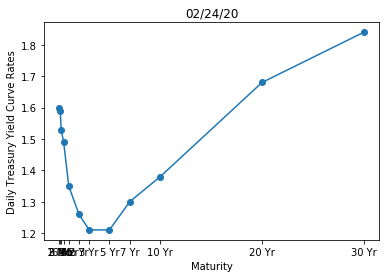

In [10]:
plt.plot(mty_float,todays_curve_no_date_float, '-o')
plt.title(today)
plt.xlabel('Maturity')
plt.xticks(mty_float,labels)
plt.ylabel('Daily Treasury Yield Curve Rates')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

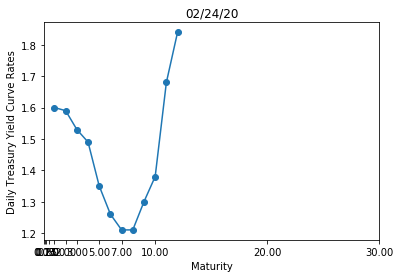

In [11]:
evenSpace = [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12]
plt.plot(evenSpace,todays_curve_no_date_float, '-o')
plt.title(today)
plt.xlabel('Maturity')
plt.xticks(mty_float)
plt.ylabel('Daily Treasury Yield Curve Rates')
plt.show